In [21]:
import sys
!{sys.executable} -m pip install yfinance

In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

gold = yf.download("GC=F", start="2018-01-01", end="2025-01-01")

gold = gold[['Open', 'High', 'Low', 'Close', 'Volume']]
gold.dropna(inplace=True)

gold.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2018-01-02,1302.300049,1317.599976,1302.300049,1313.699951,68
2018-01-03,1320.000000,1320.099976,1312.099976,1316.199951,42
2018-01-04,1319.400024,1322.000000,1319.400024,1319.400024,2
2018-01-05,1320.300049,1320.300049,1320.300049,1320.300049,1
2018-01-08,1319.900024,1319.900024,1314.599976,1318.599976,41
2018-01-09,1309.599976,1311.699951,1309.599976,1311.699951,16
2018-01-10,1320.300049,1320.699951,1315.300049,1317.400024,70
2018-01-11,1317.099976,1320.599976,1316.300049,1320.599976,9


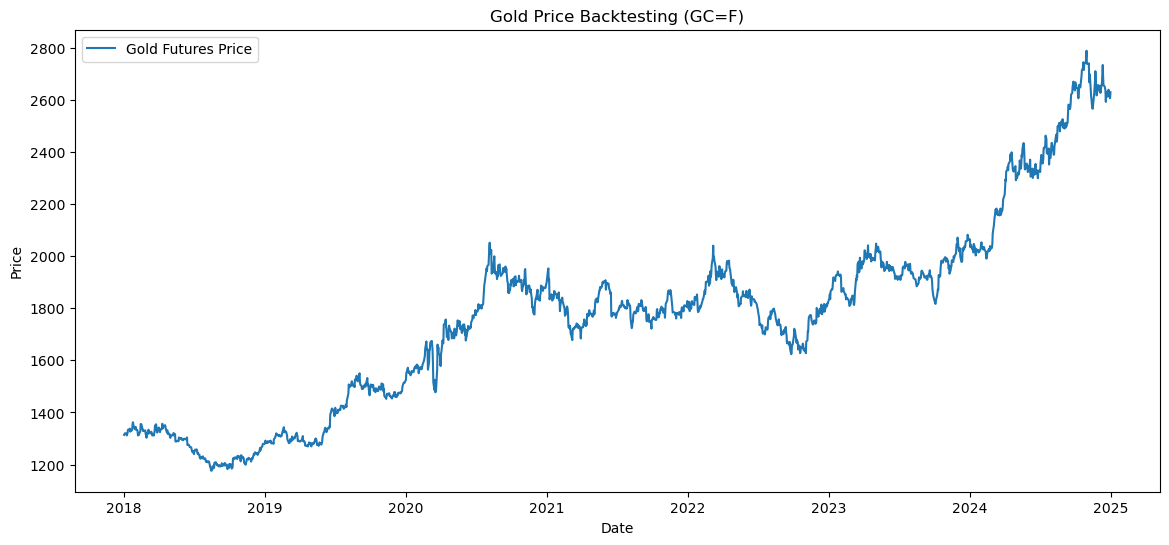

In [23]:
plt.figure(figsize=(14,6))
plt.plot(gold['Close'], label='Gold Futures Price')
plt.title('Gold Price Backtesting (GC=F)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
# Exponential Moving Averages
gold['EMA_50'] = gold['Close'].ewm(span=50, adjust=False).mean()
gold['EMA_200'] = gold['Close'].ewm(span=200, adjust=False).mean()

gold[['Close', 'EMA_50', 'EMA_200']].tail()

Price,Close,EMA_50,EMA_200
Ticker,GC=F,,
Date,,,
2024-12-24,2620.000000,2641.561512,2472.264699
2024-12-26,2638.800049,2641.453220,2473.921767
2024-12-27,2617.199951,2640.502111,2475.347421
2024-12-30,2606.100098,2639.153013,2476.648443
2024-12-31,2629.199951,2638.762696,2478.166368


In [25]:
# RSI Calculation
delta = gold['Close'].diff()

gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

rs = gain / loss
gold['RSI'] = 100 - (100 / (1 + rs))

gold[['Close', 'RSI']].tail()

Price,Close,RSI
Ticker,GC=F,
Date,,
2024-12-24,2620.000000,44.979194
2024-12-26,2638.800049,51.858616
2024-12-27,2617.199951,46.832424
2024-12-30,2606.100098,40.886580
2024-12-31,2629.199951,39.073451


In [26]:
gold['Signal'] = 0

gold.loc[
    (gold['EMA_50'] > gold['EMA_200']) & (gold['RSI'] < 40),
    'Signal'
] = 1

gold.loc[
    (gold['EMA_50'] < gold['EMA_200']) & (gold['RSI'] > 60),
    'Signal'
] = -1

gold[['Close', 'EMA_50', 'EMA_200', 'RSI', 'Signal']].tail(20)

Price,Close,EMA_50,EMA_200,RSI,Signal
Ticker,GC=F,,,,
Date,,,,,
2024-12-03,2644.699951,2637.424176,2443.678954,56.502758,0
2024-12-04,2653.800049,2638.066367,2445.769711,60.941244,0
2024-12-05,2626.600098,2637.616710,2447.569018,58.386007,0
2024-12-06,2638.600098,2637.655274,2449.469825,60.190125,0
2024-12-09,2664.899902,2638.723691,2451.613408,58.006468,0
2024-12-10,2697.600098,2641.032569,2454.061036,59.921199,0
2024-12-11,2733.800049,2644.670510,2456.844509,61.555092,0
2024-12-12,2687.500000,2646.350098,2459.139589,51.960274,0


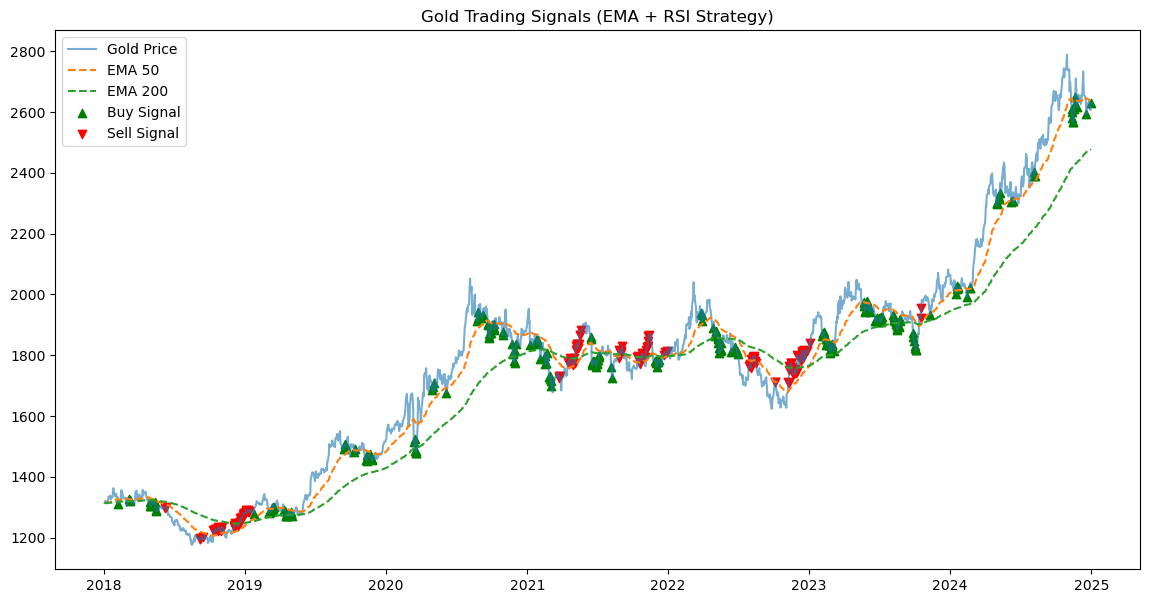

In [27]:
plt.figure(figsize=(14,7))

plt.plot(gold['Close'], label='Gold Price', alpha=0.6)
plt.plot(gold['EMA_50'], label='EMA 50', linestyle='--')
plt.plot(gold['EMA_200'], label='EMA 200', linestyle='--')

plt.scatter(
    gold.index[gold['Signal'] == 1],
    gold['Close'][gold['Signal'] == 1],
    marker='^', color='green', label='Buy Signal'
)

plt.scatter(
    gold.index[gold['Signal'] == -1],
    gold['Close'][gold['Signal'] == -1],
    marker='v', color='red', label='Sell Signal'
)

plt.title('Gold Trading Signals (EMA + RSI Strategy)')
plt.legend()
plt.show()

In [28]:
# Position: shift signal to avoid look-ahead bias
gold['Position'] = gold['Signal'].replace(-1, 0)
gold['Position'] = gold['Position'].shift(1)
gold['Position'].fillna(0, inplace=True)

gold[['Signal', 'Position']].tail(20)

C:\Users\HP\AppData\Local\Temp\ipykernel_16900\4177423570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold['Position'].fillna(0, inplace=True)


Price,Signal,Position
Ticker,,
Date,,
2024-12-03,0,0.0
2024-12-04,0,0.0
2024-12-05,0,0.0
2024-12-06,0,0.0
2024-12-09,0,0.0
2024-12-10,0,0.0
2024-12-11,0,0.0
2024-12-12,0,0.0


In [32]:
gold.columns = gold.columns.get_level_values(0)

In [33]:
# Daily market returns
gold['Market_Return'] = gold['Close'].pct_change()

# Strategy returns
gold['Strategy_Return'] = gold['Market_Return'] * gold['Position']

In [34]:
gold['Market_Equity'] = (1 + gold['Market_Return']).cumprod()
gold['Strategy_Equity'] = (1 + gold['Strategy_Return']).cumprod()

In [35]:
print(gold.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'EMA_50', 'EMA_200', 'RSI',
       'Signal', 'Position', 'Market_Return', 'Strategy_Return',
       'Market_Equity', 'Strategy_Equity'],
      dtype='object', name='Price')


In [36]:
gold.columns = gold.columns.get_level_values(0)

In [37]:
# Cumulative returns (Equity Curves)
gold['Market_Equity'] = (1 + gold['Market_Return']).cumprod()
gold['Strategy_Equity'] = (1 + gold['Strategy_Return']).cumprod()

gold[['Market_Equity', 'Strategy_Equity']].tail()

Price,Market_Equity,Strategy_Equity
Date,,
2024-12-24,1.994367,1.2254
2024-12-26,2.008678,1.2254
2024-12-27,1.992236,1.2254
2024-12-30,1.983786,1.2254
2024-12-31,2.001370,1.2254


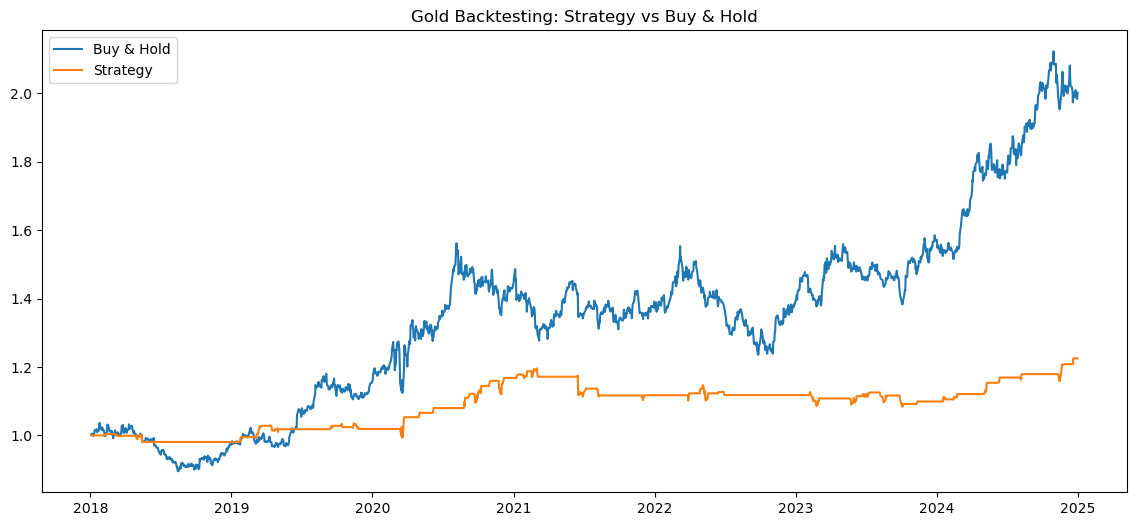

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(gold['Market_Equity'], label='Buy & Hold')
plt.plot(gold['Strategy_Equity'], label='Strategy')
plt.title('Gold Backtesting: Strategy vs Buy & Hold')
plt.legend()
plt.show()

In [48]:
# Total Return
strategy_total_return = float(gold['Strategy_Equity'].iloc[-1] - 1)
market_total_return = float(gold['Market_Equity'].iloc[-1] - 1)

# CAGR
years = float((gold.index[-1] - gold.index[0]).days / 365)
strategy_cagr = float((gold['Strategy_Equity'].iloc[-1]) ** (1/years) - 1)
market_cagr = float((gold['Market_Equity'].iloc[-1]) ** (1/years) - 1)

strategy_total_return, market_total_return, strategy_cagr, market_cagr

(0.22540033437693463,
 1.0013702130585536,
 0.029463947803220814,
 0.10419754180686236)

In [50]:
import numpy as np

sharpe_ratio = float((
    gold['Strategy_Return'].mean() /
    gold['Strategy_Return'].std()
) * np.sqrt(252))

sharpe_ratio

0.5696225993641889

In [41]:
rolling_max = gold['Strategy_Equity'].cummax()
drawdown = gold['Strategy_Equity'] / rolling_max - 1
max_drawdown = drawdown.min()

max_drawdown

-0.09364067896301898

In [45]:
# Identify trades
trades = gold['Strategy_Return'][gold['Strategy_Return'] != 0]

wins = trades[trades > 0]
losses = trades[trades < 0]

win_rate = len(wins) / len(trades)
profit_factor = float(wins.sum() / abs(losses.sum()))

win_rate, profit_factor

(0.5303643724696356, 1.3241545703891695)

In [44]:
print(f"Win Rate: {win_rate:.2%}")
print(f"Profit Factor: {profit_factor:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Win Rate: 53.04%
Profit Factor: 1.32
Sharpe Ratio: 0.57


In [49]:
metrics = {
    "Win Rate": f"{win_rate:.2%}",
    "Profit Factor": f"{profit_factor:.2f}",
    "Sharpe Ratio": f"{sharpe_ratio:.2f}",
    "Max Drawdown": f"{max_drawdown:.2%}"
}

metrics

{'Win Rate': '53.04%',
 'Profit Factor': '1.32',
 'Sharpe Ratio': '0.57',
 'Max Drawdown': '-9.36%'}

In [51]:
import numpy as np

def calculate_metrics(data, start_date, end_date):
    # Filter data by time period
    df = data.loc[start_date:end_date].copy()
    
    # Drop NaNs just in case
    df = df.dropna()
    
    # Equity curves (recalculate for this window)
    df['Market_Equity'] = (1 + df['Market_Return']).cumprod()
    df['Strategy_Equity'] = (1 + df['Strategy_Return']).cumprod()
    
    # Total Return
    total_return = df['Strategy_Equity'].iloc[-1] - 1
    
    # CAGR
    years = (df.index[-1] - df.index[0]).days / 365
    cagr = (df['Strategy_Equity'].iloc[-1])**(1/years) - 1
    
    # Sharpe Ratio
    sharpe = (
        df['Strategy_Return'].mean() /
        df['Strategy_Return'].std()
    ) * np.sqrt(252)
    
    # Max Drawdown
    rolling_max = df['Strategy_Equity'].cummax()
    drawdown = df['Strategy_Equity'] / rolling_max - 1
    max_dd = drawdown.min()
    
    # Win Rate & Profit Factor
    trades = df['Strategy_Return'][df['Strategy_Return'] != 0]
    wins = trades[trades > 0]
    losses = trades[trades < 0]
    
    win_rate = len(wins) / len(trades)
    profit_factor = wins.sum() / abs(losses.sum())
    
    # Return clean, report-ready metrics
    return {
        "Period": f"{start_date} to {end_date}",
        "Total Return": f"{total_return:.2%}",
        "CAGR": f"{cagr:.2%}",
        "Sharpe Ratio": f"{sharpe:.2f}",
        "Max Drawdown": f"{max_dd:.2%}",
        "Win Rate": f"{win_rate:.2%}",
        "Profit Factor": f"{profit_factor:.2f}"
    }

In [53]:
calculate_metrics(gold, "2018-01-01", "2025-01-01")

{'Period': '2018-01-01 to 2025-01-01',
 'Total Return': '22.54%',
 'CAGR': '2.97%',
 'Sharpe Ratio': '0.57',
 'Max Drawdown': '-9.36%',
 'Win Rate': '53.25%',
 'Profit Factor': '1.32'}